# Исследование продаж компьютерных игр

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. 

**План работ**

1. Изучить датасет.
2. Подготовить данные:
    - изменить названия столбцов (привести к нижниму регистку); 
    - преобразовать данные в нужные типы; 
    - обработать пропуски;
    - добавить новый столбец с суммарными продажами во всех регионах.
3. Посмотреть сколько игр выпускалось в разные годы.
4. Посмотреть на изменения продаж по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам.
5. Выбрать актуальный период для дальнейшего анализа.
6. Выбрать несколько потенциально прибыльных платформ.
7. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
8. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 
9. Соотнести выводы по предыдущему пункту с продажами игр на других платформах.
10. Посмотреть на общее распределение игр по жанрам.
11. Определите для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Описать различия в долях продаж.
    - Самые популярные жанры (топ-5). Пояснить разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
12. Проверьте гипотезы
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
13. Сделать общие выводы.

## Изучение общей информации о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Предобработка данных

### Замена названий столбцов

In [5]:
data.columns = data.columns.str.lower()  # приводим все названия столбцов к нижниму регистру

In [6]:
data.info()  # проверяем, что все изменения выполнены верно

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


 ### Работа с пропусками

In [7]:
data.isna().sum() # выведем количество пропусков в каждом столбце

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(15,3), legend = False, fontsize = 12)
            .set_title('Доля пропусков' + "\n", fontsize = 16, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

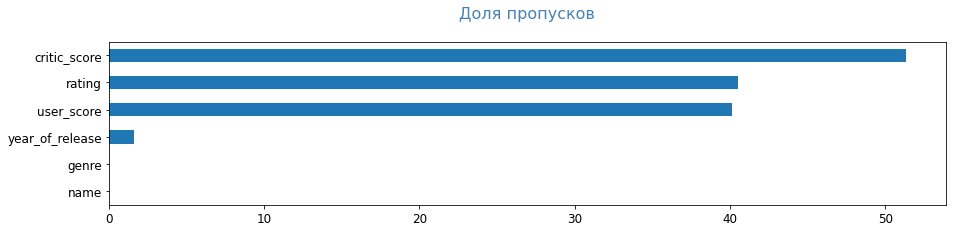

In [9]:
pass_value_barh(data) # визуализация доли пропусков в каждом столбце

In [10]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

Аббревиатура *tbd* рассшифровывается как *To Be Determined*, то есть в данном случае оценка для этих игр не была указана. Заменим это значение на NaN.  

In [11]:
data.loc[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
data = data.dropna(subset=['name']).reset_index(drop=True)

In [13]:
data['rating'] = data['rating'].fillna('unknown')

**Пропуски присутствуют в следующих столбцах:**
* `'name'`, `'genre'`. Название и жанр игры отсутствуют всего в 2 строках, в которых также нет значений многих других параметров, поэтому удалим эти строки. 
* `'year_of_release'`. В данном столбце содержится информация о годе выпуска игры. Она может отсутствовать по причине того, что год просто не указали. Поскольку такое временное значение не может быть заполнено синтетическими данными с достаточной точностью, оставим пропуски в этом столбце. 
* `'rating'`. Данный столбец содержит рейтинг от организации ESRB, то есть возрастную категорию. Значения также могут отсутствовать по причине того, что возрастная категория не была указана или определена. Заполним пропуски в этом столбце значением *unknown*, чтобы впоследствии при анализе не потерять значения продаж из этих строк.
* `'critic_score'`, `'user_score'`. В данном столбце содержится информация об оценках пользователей и критиков. Причиной появления пропусков в этих столбцах могло стать отсутствие этих данных. Заполнение усредненным значением в данном случае было бы ошибочным, поэтому оставим пропуски в этом столбце.

### Преобразование данные в нужные типы

In [14]:
data['year_of_release'] = data['year_of_release'].round().astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'])

In [15]:
data.info()  # проверим, что типы данных заменены корректно

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**Тип данных был заменен в следующих столбцах:**
* `'year_of_release'`. Год - это целочисленное значение, поэтому заменим тип данных с float на int.
* `'user_score'`. Оценка пользователей - это числовое значение, поэтому заменим тип данных с object на float.

### Добавление столбца с суммарные продажи во всех регионах

In [16]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [17]:
data.head()  # проверяем, что столбец был добавлен

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## Исследовательский анализ данных

### Количество игр, выпускаемых в разные годы

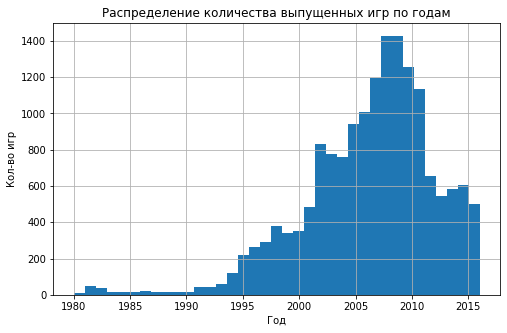

In [18]:
data.hist(column='year_of_release', bins=37, figsize=(8, 5))
plt.title("Распределение количества выпущенных игр по годам")
plt.xlabel("Год")
plt.ylabel("Кол-во игр")
plt.show()

In [19]:
len(data.query('year_of_release < 2002'))

2806

На графике видно, что до 1994 года выпускалось менее 100 игр в год, а до 2002 менее 500. Поскольку нам нужно выявить закономерности на рынке компьютерных игр актуальные для 2017 года, анализировать данные слишком большой давности будет нецелесообразно.   

### Продажи по платформам. Выбор актуального периода.

In [20]:
# посмотрим на топ-5 платформ по общей сумме продаж
data.groupby('platform').agg({'total_sales':'sum'}).sort_values('total_sales', ascending=False).head()

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


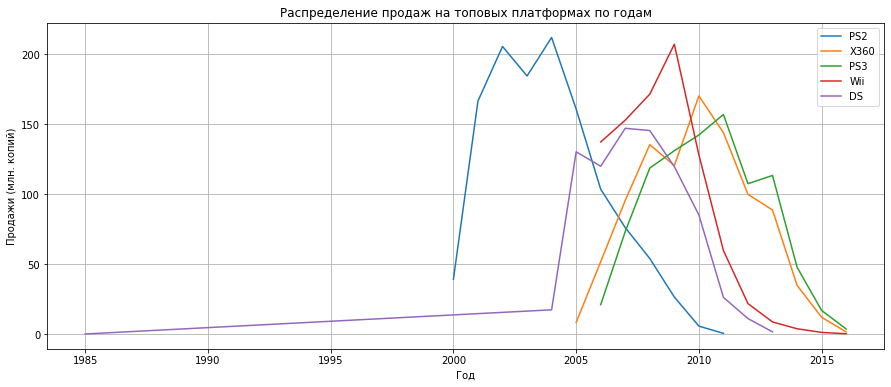

In [21]:
data.query('platform == "PS2"').groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', figsize=(15,6), grid=True)
data.query('platform == "X360"').groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', figsize=(15,6), grid=True)
data.query('platform == "PS3"').groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', figsize=(15,6), grid=True)
data.query('platform == "Wii"').groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', figsize=(15,6), grid=True)
data.query('platform == "DS"').groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', figsize=(15,6), grid=True)
plt.legend(['PS2', 'X360', 'PS3', 'Wii', 'DS'])
plt.title("Распределение продаж на топовых платформах по годам")
plt.xlabel("Год")
plt.ylabel("Продажи (млн. копий)")
plt.show()  # график общей суммы продаж на топ-5 платформ по годам

На графике видно, что характерный период от взлета продаж до начала их падения для игровых платформ составляет примерно 5 лет. Поэтому выберем актуальный период для дальнейшего анализа с 2012 года включительно. Таким образом мы захватим как новые платформы, так и старые, которые все еще остаются актуальными.   

In [22]:
data_actual = data.query('year_of_release >= 2012')

### Выбор нескольких потенциально прибыльных платформ.

In [23]:
# суммарные продажи платформ за весь актуальный период
data_actual.groupby('platform').agg({'total_sales':'sum'}).sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [24]:
# суммарные продажи платформ за 2016 год
(data_actual.groupby(['platform', 'year_of_release'])['total_sales']
            .sum()
            .unstack('platform')
            .loc[2016]
            .sort_values(ascending=False)
)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
DS        NaN
PSP       NaN
Name: 2016, dtype: float64

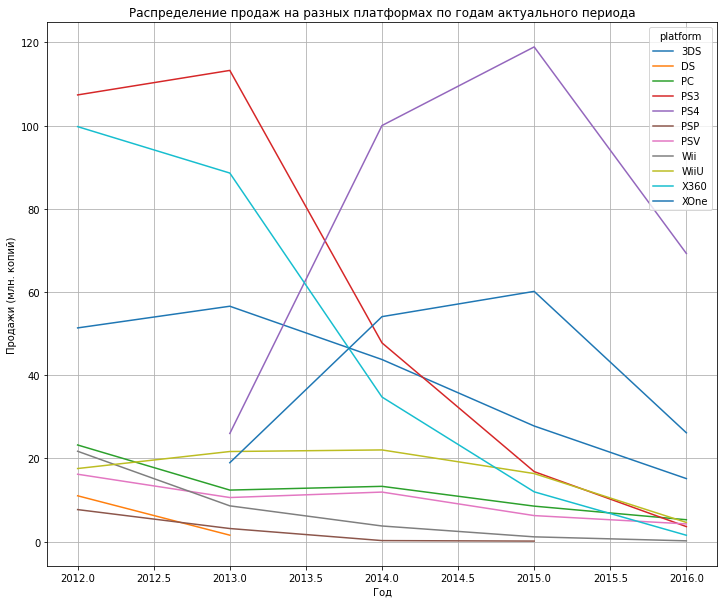

In [25]:
# график общей суммы продаж за каждый год актуального периода по каждой платформе
(data_actual.groupby(['platform', 'year_of_release'])['total_sales']
            .sum()
            .unstack('platform')
            .plot(figsize=(12,10), grid=True)
)
plt.title("Распределение продаж на разных платформах по годам актуального периода")
plt.xlabel("Год")
plt.ylabel("Продажи (млн. копий)")
plt.show()

Из таблицы видно, что по общей сумме продаж **за весь актуальный период выделяется следующий топ-5 платформ: PS4, PS3, X360, 3DS и XOne**. Однако из данных 2016 года становится очевидно, что PS3 и X360 попали в основной топ из-за своих высоких продаж в предыдущие годы. На момент 2016 эти платформы уже потеряли свою актуальность, а им на смену пришло новое поколение PS4 и XOne.

На графике видно, что ни одна платформа не показывает рост продаж с 2015 по 2016 годы, что может быть признаком того, что в ближайшее время появятся новые платформы. 
* На момент 2016 на рынке по продажам преобладают PS4 и XOne. Кроме того, видно, что их продажи росли в предыдущие годы. 
* Также заметно высокие показатели дает платформа 3DS. Ее продажи идут на спад последние годы, однако не так сильно, как у прошлых лидеров рынка: PS3 и X360. 
* Еще одной платформой, на которую стоит обратить внимание, является PC. Персональные компьютеры - это платформа, которая показывает не самые высокие продажи, но и не исчезает полностью.

Таким образом можно выделить следующие потенциально прибыльные платформы на 2017 год: **PS4, XOne, 3DS и PC**.

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.

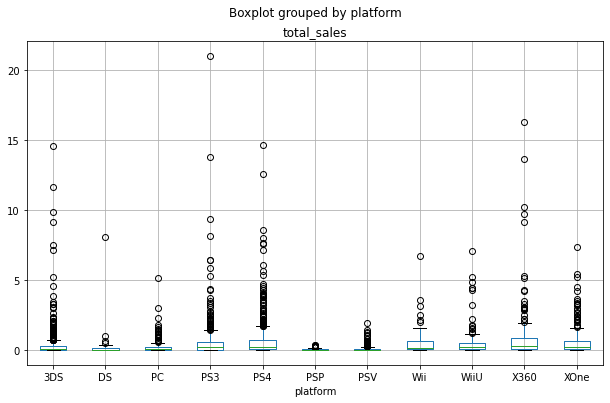

In [26]:
data_actual.boxplot(by='platform', column='total_sales', figsize=(10,6))
plt.show()

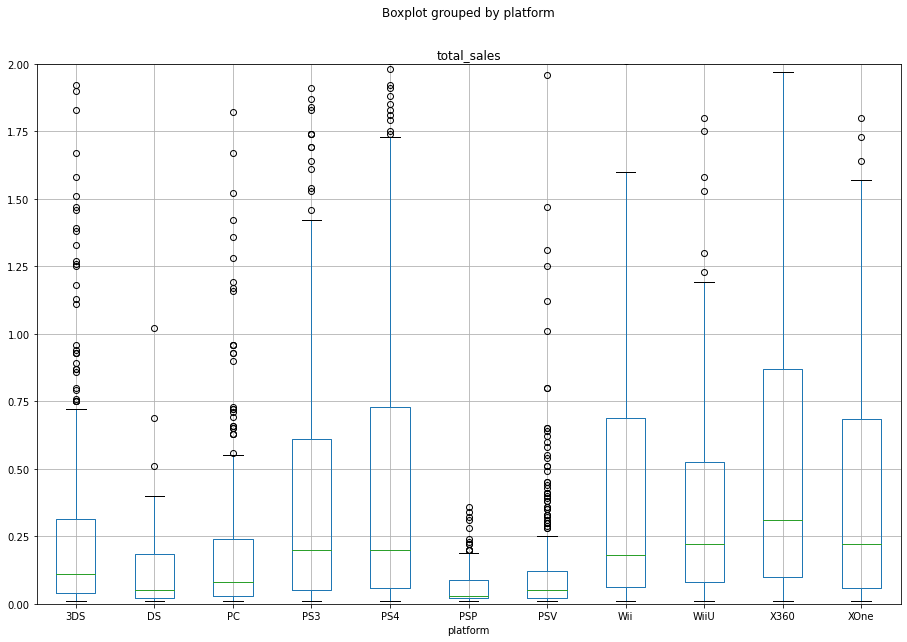

In [27]:
data_actual.boxplot(by='platform', column='total_sales', figsize=(15,10))
plt.ylim(0, 2)
plt.show()

**Из диаграмм размаха можно сделать следующие выводы:**
* Больше всего верхних выбросов, то есть хитовых по продажам игр, у 2 предыдущих лидеров рынка PS3 и X360, что вполне ожидаемо.
* Достаточно большое количество хитов имеют платформы PS4 и 3DS. Также неплохие показатели дает XOne.
* Самая высокое медианное значение по глобальным продажам у X360.
* Достаточно высокие медианные значения у XOne и WiiU. Однако WiiU - это платформа, у которой к 2016 году уже достаточно сильно упали продажи.
* Медианные значения продаж у PS3 и PS4 почти одинаковые.
* Новые и старые лидеры рынка (PS3, X360 и PS4, XOne) имеют сильный разброс вокруг медианы.
* У всех платформ наблюдается тенденция сдвига медианы к 1-му квартилю, что говорит о следующем: да, платформы имеют определенные хиты продаж, но в массе количество проданных копий игр находится в невысоком числовом диапазоне.

### Изучение влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков.

Для анализа возьмем **платформу PS4**, которая является лидером рынка как на 2016 год, так и за весь актуальный период.

In [28]:
data_ps4 = data_actual.query('platform == "PS4"')

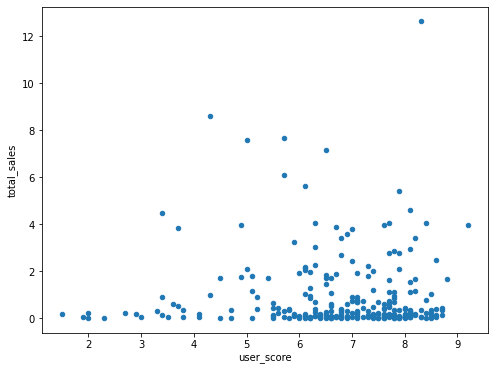

In [29]:
# диаграмма рассеяния, связь продаж и оценок пользователей
data_ps4.plot(x='user_score', y='total_sales', kind='scatter', figsize=(8,6)) 
plt.show()

In [30]:
data_ps4['total_sales'].corr(data_ps4['user_score'])

-0.03195711020455645

На диаграмме рассеяния нет явно читающейся зависимости между оценками пользователей и продажами.

Коэффициент корреляции Пирсона равен -0.03. Значение очень близкое к 0. Оно говорит об очень слабой отрицательной корреляции. Такая корреляция в расчет не берется.

Скорее всего, мнение других пользователей не так важно для покупателей игр, и большинство предпочитает составить свое собственное мнение.

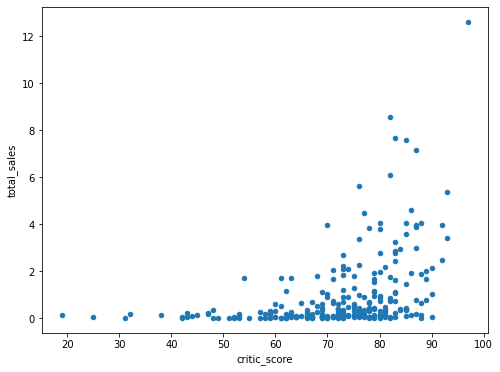

In [31]:
# диаграмма рассеяния, связь продаж и оценок критиков
data_ps4.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(8,6)) 
plt.show()

In [32]:
data_ps4['total_sales'].corr(data_ps4['critic_score'])

0.406567902061781

На диаграмме рассеяния присутствует увеличение объема продаж при росте оценки критиков для части данных.

Коэффициент корреляции Пирсона равен 0.41. Такое значение говорит о слабой положительной корреляции. Однако это значение не так близко к 0, как в случае с отзывами пользователей. Нужно посмотреть на значение корреляции продаж и отзывов для всех игр, независимо от платформы.

### Соотнесение выводов по предыдущему пункту с продажами игр на других платформах.

**Анализ Xbox One**

In [33]:
data_xone = data_actual.query('platform == "XOne"')

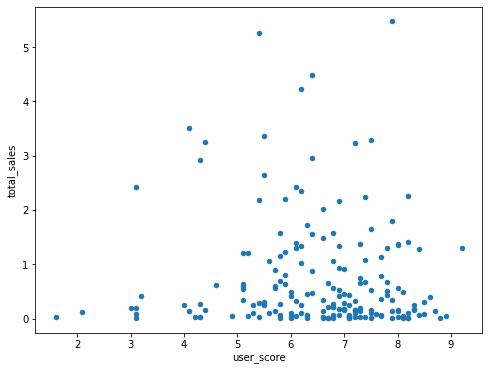

In [34]:
# диаграмма рассеяния, связь продаж и оценок пользователей
data_xone.plot(x='user_score', y='total_sales', kind='scatter', figsize=(8,6)) 
plt.show()

In [35]:
data_xone['total_sales'].corr(data_xone['user_score'])

-0.06892505328279412

На диаграмме рассеяния нет явно читающейся зависимости между оценками пользователей и продажами.

Коэффициент корреляции Пирсона равен -0.06. Значение очень близкое к 0. Оно говорит об очень слабой отрицательной корреляции. Такая корреляция в расчет не берется.

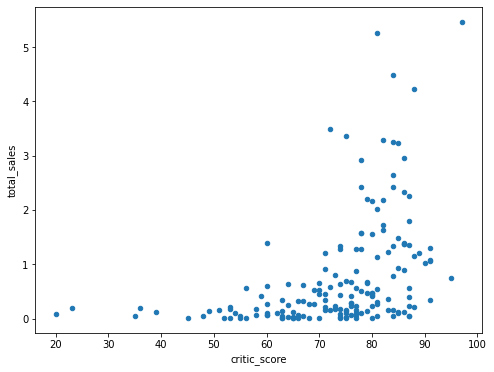

In [36]:
# диаграмма рассеяния, связь продаж и оценок критиков
data_xone.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(8,6)) 
plt.show()

In [37]:
data_xone['total_sales'].corr(data_xone['critic_score'])

0.41699832800840186

На диаграмме рассеяния присутствует увеличение объема продаж при росте оценки критиков для части данных.

Коэффициент корреляции Пирсона равен 0.42. Такое значение говорит о слабой положительной корреляции. Однако это значение не так близко к 0, как в случае с отзывами пользователей. Нужно посмотреть на значение корреляции продаж и отзывов для всех игр, независимо от платформы.

**Анализ 3DS**

In [56]:
data_3ds = data_actual.query('platform == "3DS"')

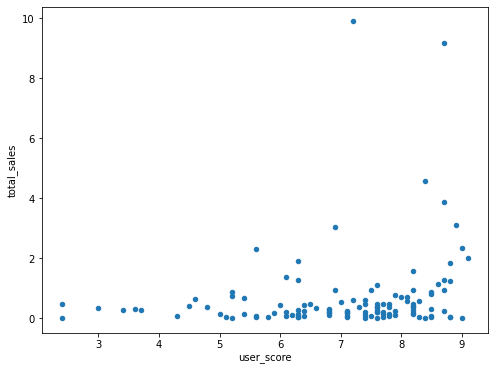

In [57]:
# диаграмма рассеяния, связь продаж и оценок пользователей
data_3ds.plot(x='user_score', y='total_sales', kind='scatter', figsize=(8,6)) 
plt.show()

In [58]:
data_3ds['total_sales'].corr(data_3ds['user_score'])

0.19758263411038599

На диаграмме рассеяния нет явно читающейся зависимости между оценками пользователей и продажами.

Коэффициент корреляции Пирсона равен 0.2. Значение очень близкое к 0. Оно говорит о слабой положительной корреляции. Такая корреляция в расчет не берется.

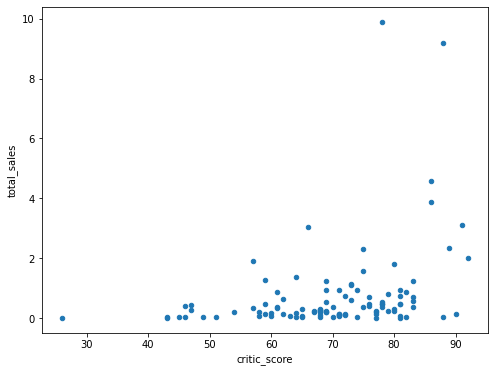

In [59]:
# диаграмма рассеяния, связь продаж и оценок критиков
data_3ds.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(8,6)) 
plt.show()

In [60]:
data_3ds['total_sales'].corr(data_3ds['critic_score'])

0.32080286953607856

На диаграмме рассеяния нет явно читающейся зависимости между оценками пользователей и продажами.

Коэффициент корреляции Пирсона равен 0.32. Такое значение говорит о слабой положительной корреляции. Такая корреляция в расчет не берется.

**Анализ PC**

In [61]:
data_pc = data_actual.query('platform == "PC"')

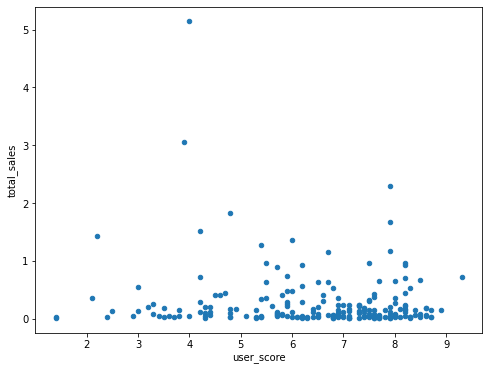

In [62]:
# диаграмма рассеяния, связь продаж и оценок пользователей
data_pc.plot(x='user_score', y='total_sales', kind='scatter', figsize=(8,6)) 
plt.show()

In [63]:
data_pc['total_sales'].corr(data_pc['user_score'])

-0.12186747630735577

На диаграмме рассеяния нет явно читающейся зависимости между оценками пользователей и продажами.

Коэффициент корреляции Пирсона равен -0.12. Значение очень близкое к 0. Оно говорит об очень слабой отрицательной корреляции. Такая корреляция в расчет не берется.

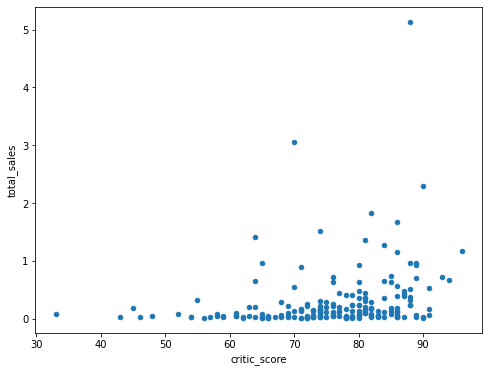

In [64]:
# диаграмма рассеяния, связь продаж и оценок критиков
data_pc.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(8,6)) 
plt.show()

In [65]:
data_pc['total_sales'].corr(data_pc['critic_score'])

0.23724324311567926

На диаграмме рассеяния нет явно читающейся зависимости между оценками пользователей и продажами.

Коэффициент корреляции Пирсона равен 0.23. Такое значение говорит о слабой положительной корреляции. Такая корреляция в расчет не берется.

**После анализа корреляций продаж с отзывами пользователей и критиков для всех актуальных платформ можно сделать следующие выводы:**
* Корреляций продаж с отзывами пользователей для одних платформ отрицательная (PS4, XOne и PC), а для других - положительная (3DS). Однако корреляция для всех платформ почти равна 0, а значит отклонения в ту или другую сторону в данном случае не так значимы: связь между продаж и отзывами пользователей отсутсвует.
* Корреляций продаж с отзывами критиков для всех платформ положительная и колеблется от 0.2 до 0.4. Это говорит о слишком слабой связи между эти двумя параметрами, которую обычно не учитывают.

### Корреляция продаж с отзывами пользователей и критиков для всех платформ.

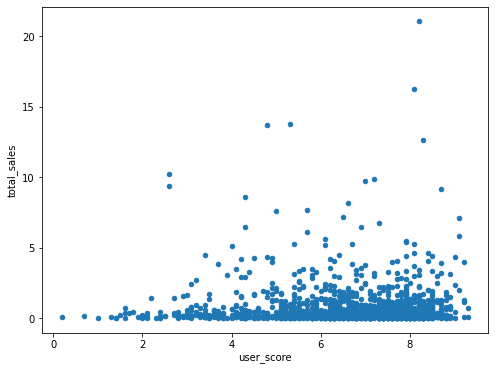

In [38]:
# диаграмма рассеяния, связь продаж и оценок пользователей
data_actual.plot(x='user_score', y='total_sales', kind='scatter', figsize=(8,6)) 
plt.show()

In [39]:
data_actual['total_sales'].corr(data_actual['user_score'])

0.004428817675493264

На диаграмме рассеяния нет явно читающейся зависимости между оценками пользователей и продажами.

Коэффициент корреляции Пирсона равен 0.004. Значение очень близкое к 0. Оно говорит об очень слабой положительной корреляции. Такая корреляция в расчет не берется.

При анализе корреляции для всех актуальных данных, независимо от платформы, коэффициент получился положительный, а для данных только по PS4 - отрицательный. Это можно объяснить тем, что корреляция и в том, и в другом случае почти равна 0, а значит отклонения в ту или другую сторону в данном случае не значимы.

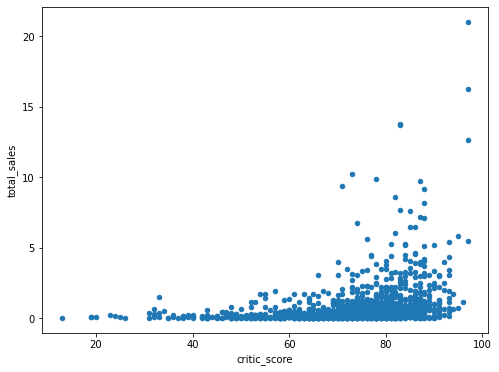

In [40]:
# диаграмма рассеяния, связь продаж и оценок критиков
data_actual.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(8,6)) 
plt.show()

In [41]:
data_actual['total_sales'].corr(data_actual['critic_score'])

0.308196745920778

На диаграмме рассеяния нет явно читающейся зависимости между оценками критиков и продажами.

Коэффициент корреляции Пирсона равен 0.31. Такое значение говорит о слабой положительной корреляции.

При анализе корреляции для всех актуальных данных, независимо от платформы, коэффициент получился еще ниже, чем при анализе данных только по PS4. Этот факт только больше подтверждает отсутствие зависимости между оценками критиков и продажами.

### Общее распределение игр по жанрам

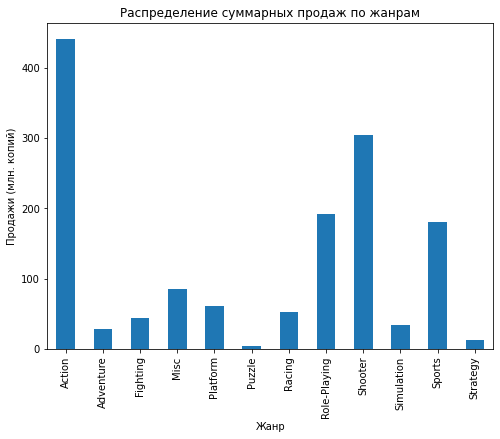

In [72]:
data_actual.groupby('genre')['total_sales'].sum().plot(kind='bar', figsize=(8,6))
plt.title("Распределение суммарных продаж по жанрам")
plt.xlabel("Жанр")
plt.ylabel("Продажи (млн. копий)")
plt.show()

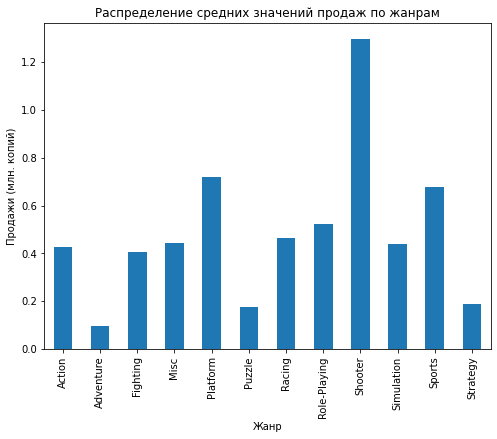

In [71]:
data_actual.groupby('genre')['total_sales'].mean().plot(kind='bar', figsize=(8,6))
plt.title("Распределение средних значений продаж по жанрам")
plt.xlabel("Жанр")
plt.ylabel("Продажи (млн. копий)")
plt.show()

**Из графика средних значений можно сделать следующие выводы:**
* Самый прибыльный жанр - Shooter.
* Топ-5 жанров с самыми высокими средними значениями продаж: Shooter, Platform, Sports, Role-Playing и Racing.
* Самые низкие средние значения продаж у жанров Adventure и Puzzle.

## Портрет пользователя каждого региона

### Пользователи из Северной Америки (NA)

**Самые популярные платформы (топ-5)**

In [43]:
# na_sales - суммарные продажи платформы в Северной Америке
# share - доля продаж определенной платформы от всей суммы продаж в регионе по всем платформам (в процентах)
na_total_sum = data_actual['na_sales'].sum()
(data_actual.groupby('platform')['na_sales']
            .agg([('na_sales', 'sum'), ('share', lambda na_sales: na_sales.sum() / na_total_sum * 100)])
            .round(2)
            .sort_values('na_sales', ascending=False)
            .head()
)

,na_sales,share
platform,,
X360,140.05,23.70
PS4,108.74,18.40
PS3,103.38,17.49
XOne,93.12,15.76
3DS,55.31,9.36


**Топ-5 самых популярных платформа в Северной Америке:**
1. X360 - около 24% всех продаж в регионе
2. PS4
3. PS3
4. XOne
5. 3DS - около 9% всех продаж в регионе

Верхние строчки топа занимают консоли от Microsoft и Sony, однако X360 в Америке пока еще лидирует.

**Самые популярные жанры (топ-5)**

In [44]:
# na_sales - суммарные продажи жанра в Северной Америке
# share - доля продаж определенного жанра от всей суммы продаж в регионе по всем платформам (в процентах)
(data_actual.groupby('genre')['na_sales']
            .agg([('na_sales', 'sum'), ('share', lambda na_sales: na_sales.sum() / na_total_sum * 100)])
            .round(2)
            .sort_values('na_sales', ascending=False)
            .head()
)

,na_sales,share
genre,,
Action,177.84,30.09
Shooter,144.77,24.50
Sports,81.53,13.80
Role-Playing,64.00,10.83
Misc,38.19,6.46


**Топ-5 самых популярных жанров в Северной Америке:**
1. Action - около 30% всех продаж в регионе
2. Shooter
3. Sports
4. Role-Playing
5. Misc - около 6% всех продаж в регионе

Тенденции в жанрах в Северной Америке совпадают с теми тенденциями, которые мы видели при анализе общих продаж по всем регионам.

**Влияет ли рейтинг ESRB на продажи?**

In [45]:
(data_actual.groupby('rating')['na_sales']
            .agg([('na_sales', 'sum'), ('mean_na_sales', 'mean'), ('count_games', 'count')])
            .round(2)
            .sort_values('mean_na_sales', ascending=False)
)

,na_sales,mean_na_sales,count_games
rating,,,
M,231.57,0.46,498
E,114.37,0.29,395
E10+,75.70,0.25,306
T,66.02,0.16,412
unknown,103.31,0.08,1275


Можно сказать, что самое высокое среднее количество продаж в Северной Америке у рейтинга M, то есть "взрослые" игры продаются лучше. На втором месте по продажам рейтинг E, то есть игры для всех.

### Пользователи из Европы (EU)

**Самые популярные платформы (топ-5)**

In [46]:
# eu_sales - суммарные продажи платформы в Европе
# share - доля продаж определенной платформы от всей суммы продаж в регионе по всем платформам (в процентах)
eu_total_sum = data_actual['eu_sales'].sum()
(data_actual.groupby('platform')['eu_sales']
            .agg([('eu_sales', 'sum'), ('share', lambda eu_sales: eu_sales.sum() / eu_total_sum * 100)])
            .round(2)
            .sort_values('eu_sales', ascending=False)
            .head()
)

,eu_sales,share
platform,,
PS4,141.09,27.84
PS3,106.86,21.08
X360,74.52,14.70
XOne,51.59,10.18
3DS,42.64,8.41


**Топ-5 самых популярных платформа в Европе:**
1. PS4 - около 28% всех продаж в регионе
2. PS3
3. X360
4. XOne
5. 3DS - около 8% всех продаж в регионе

В Европе, в отличии от Америки, обе консоли от Sony обошли по продажам серию Xbox от Microsoft.

**Самые популярные жанры (топ-5)**

In [47]:
# eu_sales - суммарные продажи жанра в Европе
# share - доля продаж определенного жанра от всей суммы продаж в регионе по всем платформам (в процентах)
(data_actual.groupby('genre')['eu_sales']
            .agg([('eu_sales', 'sum'), ('share', lambda eu_sales: eu_sales.sum() / eu_total_sum * 100)])
            .round(2)
            .sort_values('eu_sales', ascending=False)
            .head()
)

,eu_sales,share
genre,,
Action,159.34,31.44
Shooter,113.47,22.39
Sports,69.09,13.63
Role-Playing,48.53,9.58
Racing,27.29,5.38


**Топ-5 самых популярных жанров в Европе:**
1. Action - около 31% всех продаж в регионе
2. Shooter
3. Sports
4. Role-Playing
5. Racing - около 5% всех продаж в регионе

Тенденции в жанрах в Европе похожи на те, что есть в Северной Америке. Отличие лишь в том, что в Европе 5 место занимает жанр Racing.

**Влияет ли рейтинг ESRB на продажи?**

In [48]:
(data_actual.groupby('rating')['eu_sales']
            .agg([('eu_sales', 'sum'), ('mean_eu_sales', 'mean'), ('count_games', 'count')])
            .round(2)
            .sort_values('mean_eu_sales', ascending=False)
)

,eu_sales,mean_eu_sales,count_games
rating,,,
M,193.96,0.39,498
E,113.03,0.29,395
E10+,55.37,0.18,306
T,52.96,0.13,412
unknown,91.50,0.07,1275


Можно сказать, что в Европе, как и в Северной Америке, самое высокое среднее количество продаж у рейтинга M, то есть "взрослые" игры продаются лучше. На втором месте по продажам рейтинг E, то есть игры для всех.

### Пользователи из Японии (JP)

**Самые популярные платформы (топ-5)**

In [49]:
# jp_sales - суммарные продажи платформы в Японии
# share - доля продаж определенной платформы от всей суммы продаж в регионе по всем платформам (в процентах)
jp_total_sum = data_actual['jp_sales'].sum()
(data_actual.groupby('platform')['jp_sales']
            .agg([('jp_sales', 'sum'), ('share', lambda jp_sales: jp_sales.sum() / jp_total_sum * 100)])
            .round(2)
            .sort_values('jp_sales', ascending=False)
            .head()
)

,jp_sales,share
platform,,
3DS,87.79,45.59
PS3,35.29,18.32
PSV,21.04,10.93
PS4,15.96,8.29
WiiU,13.01,6.76


**Топ-5 самых популярных платформа в Европе:**
1. 3DS - около 46% всех продаж в регионе
2. PS3
3. PSV
4. PS4
5. WiiU - около 7% всех продаж в регионе

Японский рынок сильно отличается от европейского и американского. Большую популярность имеет 3DS - портативная консоль от Nintendo, японской компании.

**Самые популярные жанры (топ-5)**

In [50]:
# jp_sales - суммарные продажи жанра в Японии
# share - доля продаж определенного жанра от всей суммы продаж в регионе по всем платформам (в процентах)
(data_actual.groupby('genre')['jp_sales']
            .agg([('jp_sales', 'sum'), ('share', lambda jp_sales: jp_sales.sum() / jp_total_sum * 100)])
            .round(2)
            .sort_values('jp_sales', ascending=False)
            .head()
)

,jp_sales,share
genre,,
Role-Playing,65.44,33.98
Action,52.80,27.42
Misc,12.86,6.68
Simulation,10.41,5.41
Fighting,9.44,4.90


**Топ-5 самых популярных жанров в Европе:**
1. Role-Playing - около 34% всех продаж в регионе
2. Action
3. Misc
4. Simulation
5. Fighting - около 5% всех продаж в регионе

В плане жанров японский рынок также необычен. Большую популярность имеет Role-Playing, а также в топ попадают Simulation и Fighting, чего не было ни в Европе, ни в Северной Америке.

**Влияет ли рейтинг ESRB на продажи?**

In [51]:
(data_actual.groupby('rating')['jp_sales']
            .agg([('jp_sales', 'sum'), ('mean_jp_sales', 'mean'), ('count_games', 'count')])
            .round(2)
            .sort_values('mean_jp_sales', ascending=False)
)

,jp_sales,mean_jp_sales,count_games
rating,,,
unknown,108.84,0.09,1275
E,28.33,0.07,395
T,26.02,0.06,412
M,21.20,0.04,498
E10+,8.19,0.03,306


Можно сказать, что в Японии самое высокое среднее количество продаж у игр с неизвестным или неустановленным рейтингом. ESRB - это организация, которая определяет рейтинги для компьютерных видеоигр в США и Канаде. Возможно игры, которые популярны в Японии, выпускаются больше на локальный рынок, и потому они не имеют категории. 

На втором месте по продажам, как и в других регионах, рейтинг E, то есть игры для всех.

## Проверка статистических гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [52]:
xone_user_score = data_actual.query('platform == "XOne"')['user_score'].dropna()
pc_user_score = data_actual.query('platform == "PC"')['user_score'].dropna()
alpha = .01

In [53]:
results = st.ttest_ind(xone_user_score, pc_user_score, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


В данном случае применяем t-test для проверки гипотезы о равенстве среднего двух независимых генеральных совокупностей. Гипотеза двусторонняя, уровнем значимости возьмем равный 0.01. Параметр equal_var указываем False, так как выборки имеют разный объем. 

По результатам теста нулевая гипотеза не может быть отвергнута, соответственно, можно сказать, что **средние пользовательские рейтинги платформ Xbox One и PC одинаковые**. 

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports разные.

In [54]:
action_user_score = data_actual.query('genre == "Action"')['user_score'].dropna()
sports_user_score = data_actual.query('genre == "Sports"')['user_score'].dropna()
alpha = .01

In [55]:
results = st.ttest_ind(action_user_score, sports_user_score, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


В данном случае применяем t-test для проверки гипотезы о равенстве среднего двух независимых генеральных совокупностей. Гипотеза двусторонняя, уровнем значимости возьмем равный 0.01. Параметр equal_var указываем False, так как выборки имеют разный объем. 

По результатам теста мы отвергаем нулевую гипотезу, соответственно, можно сказать, что **средние пользовательские рейтинги жанров Action и Sports разные**. 

## Общий вывод

**Из всего анализа в целом можно сделать следующие выводы:**
1. Характерный период от взлета продаж до начала их падения для игровых платформ составляет примерно 5 лет. Поэтому для планирования кампании на 2017-й мы анализируем данные с 2012 года включительно.
2. Потенциально прибыльные платформы на 2017 год являются: PS4, XOne, 3DS и PC.
3. Больше всего хитовых по продажам игр, у 2 предыдущих лидеров рынка PS3 и X360, а также у нынешних лидеров PS4, XOne и 3DS.
4. Отзывы пользователей и критиков не влияют на продажи игр.
5. Топ-5 жанров с самыми высокими продажами: Action, Shooter, Role-Playing, Sports, Misc.
6. Портреты пользователей Северной Америки и Европы очень похожи: эти пользователи предпочитают одни и те же платформы и жанры. Самые популярные платформы X360 и PS4, а жанр - Action.
7. Японский рынок сильно отличается от европейского и американского. Пользователи из Японии предпочитают платформу 3DS и жанр Role-Playing.
8. В среднем в Америке и Европе больше покупают игры с рейтингами M и E. В Японии часто покупают игры с неизвестным или неустановленным рейтингом.
9. Проверка статистических гипотез показала, что:
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - средние пользовательские рейтинги жанров Action и Sports разные.